### Fake Some Data


In [291]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from scipy import stats 
from scipy.stats import truncnorm
from matplotlib import pyplot

In [251]:
from sklearn.datasets import make_moons
def moon_classification_data(n_samples=100, noise=0.1):
    X, y = make_moons(n_samples=100, noise=0.1)
    df=pd.DataFrame(X,y)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.show()
    return df,X, y

In [252]:
from sklearn.datasets import make_regression
def regression_data(n_samples=100, noise=0.1):
    X, y = make_regression(n_samples=n_samples, n_features=1, noise=noise)
    df=pd.DataFrame(X,y)
    plt.figure(figsize=(8, 6))
    pyplot.scatter(X,y)
    plt.show()
    return df,X, y

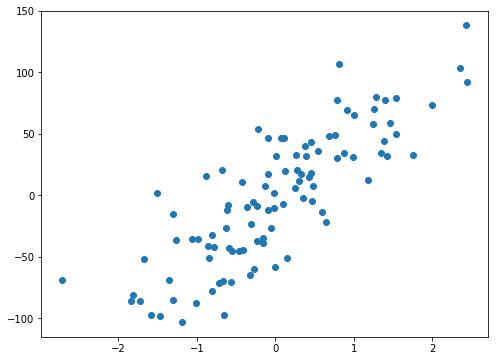

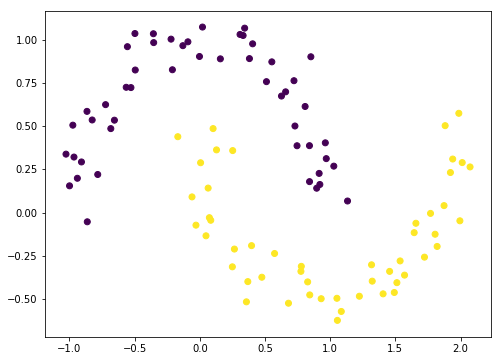

X_1 shape: (100, 1)
y_1 shape: (100, 1)
X_2 shape: (100, 1)
y_2 shape: (100, 2)


In [253]:
df_1,X_1, y_1=regression_data(n_samples=100, noise=30)
df_2,X_2, y_2=moon_classification_data(n_samples=100, noise=0.1)

print('X_1 shape:',np.shape(X_1))
print('y_1 shape:',np.shape(X_1))
print('X_2 shape:',np.shape(X_1))
print('y_2 shape:',np.shape(X_2))

In [254]:
import string
import random
def random_letter_column(n_letters):
    rletters=[random.choice(string.ascii_letters) for x in range(n_letters)]
    return rletters

In [255]:
import random
import time

n_times=len(df_3)
start="1/1/2000 1:30 PM"
end="1/1/2019 4:50 AM"

def random_times(start, end, n_times):
    format = '%m/%d/%Y %I:%M %p'
    stime = time.mktime(time.strptime(start, format))
    etime = time.mktime(time.strptime(end, format))
    rtime = [time.strftime(format, \
    time.localtime(stime + random.random() * \
    (etime - stime))) for x in range(n_times)]
    return rtime

rtime=random_times(start, end, n_times)

In [256]:
def combine_fake_data(X_1,X_2,y_1,y_2):
    X_3=np.hstack((X_1, X_2))
    y_3=np.vstack((y_1, y_2)).T
    df_3=pd.DataFrame(np.hstack((X_3, y_3)))
    pyplot.scatter(df_3[0],df_3[3])
    return X_3,y_3,df_3

In [257]:
from sklearn.decomposition import PCA
def viz_pca(X,components=2):
    pca = PCA(n_components=2, whiten=True).fit(X)
    print('Orthogonal Vectors:',pca.components_,'\n')
    print('Variance Retained:',sum(pca.explained_variance_ratio_))
    X_pca = pca.transform(X)
    pyplot.scatter(X[:,0], X[:,1])  
    return X_pca

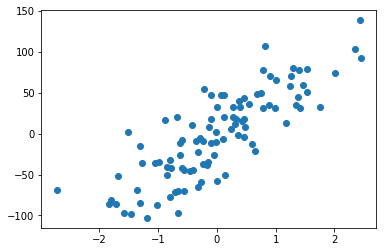

In [258]:
X_3,y_3,df_3=combine_fake_data(X_1,X_2,y_1,y_2)

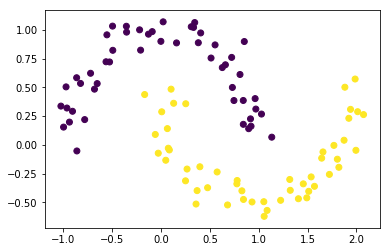

In [259]:
plt.scatter(df_3[1], df_3[2], c=df_3[4])
plt.show()

In [260]:
data=df_3
letter_col=list(map(str.lower,random_letter_column(len(data))))#lowercase values
data.columns=random_letter_column(len(data.columns))
data['letters']=letter_col
data['times']=rtime
data['times']=pd.to_datetime(data['times'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
i          100 non-null float64
x          100 non-null float64
N          100 non-null float64
p          100 non-null float64
l          100 non-null float64
letters    100 non-null object
times      100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 5.5+ KB


### Relabel DataFrame

In [262]:
data.columns=['blood_pressure','EEG','white_count','blood_sugar','cancer_status','cohort','diagnosis_time']
data.head()

,blood_pressure,EEG,white_count,blood_sugar,cancer_status,cohort,diagnosis_time
0,0.599863,0.332317,1.023432,-13.340146,0.0,w,2001-03-10 20:27:00
1,0.881462,-0.353506,0.982275,34.651783,0.0,u,2013-12-09 13:41:00
2,0.395445,-0.682293,0.485247,32.375358,0.0,a,2015-10-31 03:42:00
3,-1.301361,-0.220292,1.002269,-15.447963,0.0,x,2015-06-21 05:55:00
4,-0.163032,1.133089,0.066838,-38.323072,0.0,r,2001-01-12 17:35:00


In [312]:
data.describe()

,blood_pressure,EEG,white_count,blood_sugar,cancer_status
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.014520,0.516190,0.242553,-1.452192,0.500000
std,1.016293,0.864636,0.498390,53.685956,0.502519
min,-2.715657,-1.025968,-0.623049,-102.938235,0.000000
25%,-0.660635,-0.067390,-0.199582,-42.369302,0.000000
50%,-0.036511,0.531973,0.265996,-0.107191,0.500000
75%,0.656988,1.062800,0.636142,35.059675,1.000000
max,2.443722,2.072756,1.072089,138.192448,1.000000


#### Bin Data


In [336]:
def bin_data(data,quantile=False):
    '''
    Creates 'bins' number of bins and discretizes the data.
    Uses cut function by default. qcut function otherwise.
    '''
    bins = int(np.sqrt(len(data)))
    if quantile:
        new_data = pd.qcut(data, bins, labels=list(range(bins)))
    else:
        new_data = pd.cut(data, bins, labels=list(range(bins)))
    return new_data 

In [335]:
bin_data(data['blood_pressure'])

[0.060414192724336124,
 0.12771498366702538,
 0.2839872707367235,
 0.3928456153926868,
 0.48056348770994645,
 0.6244119039755383,
 0.7186519738310587,
 0.8160348848783505,
 0.9481351207331232]

#### Make Plots

In [337]:
def plot_histograms(dataframe):
    for i in dataframe.columns:
        if np.dtype(dataframe[i]) == 'int' or np.dtype(dataframe[i]) == 'float':
            fig = plt.figure()
            plt.hist(bin_data(dataframe[i]))
            fig.suptitle('Histogram: '+i)
            plt.xlabel(i)
        else:
            pass

In [304]:
def KDE_plots(dataframe):
    for i in dataframe.columns:
        if np.dtype(dataframe[i]) == 'int' or np.dtype(dataframe[i]) == 'float':
            sns.kdeplot(dataframe[i],bw='silverman',label=i,shade=True)
            plt.show()
        else:
            pass

In [302]:
def CDF_plots(dataframe):
    for i in dataframe.columns:
        if np.dtype(dataframe[i]) == 'int' or np.dtype(dataframe[i]) == 'float':
            lower,upper=dataframe[i].min(),dataframe[i].max()
            mu,sigma = dataframe[i].mean(),dataframe[i].std()
            values = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
            sns.kdeplot(dataframe[i],cumulative=True,label=dataframe[i].name+" CDF",color='b')
            sns.kdeplot(values.rvs(1000),cumulative=True,label="Gaussian CDF",color='r')
            plt.suptitle("CDF Against Bell-Curve: "+i)
            plt.show()
            plt.clf()

In [308]:
def box_plots(dataframe):
    for i in dataframe.columns:
        if np.dtype(dataframe[i]) == 'int' or np.dtype(dataframe[i]) == 'float':
            sns.boxplot(dataframe[i])
            plt.show()
        else:
            pass

In [317]:
import pylab
def qq_plots(dataframe):
    for i in dataframe.columns:
        if np.dtype(dataframe[i]) == 'int' or np.dtype(dataframe[i]) == 'float':
            stats.probplot(dataframe[i], dist="norm", plot=pylab)
            pylab.show()
        else:
            pass

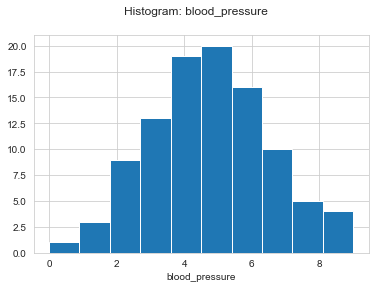

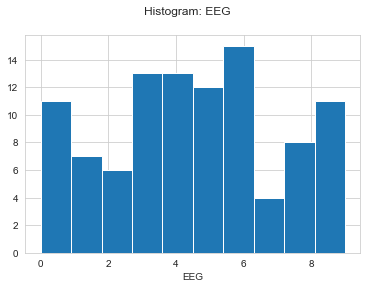

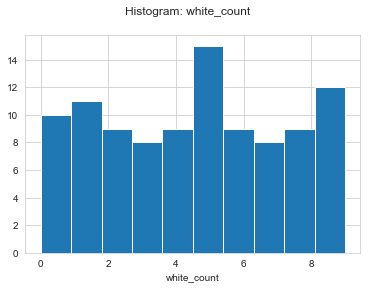

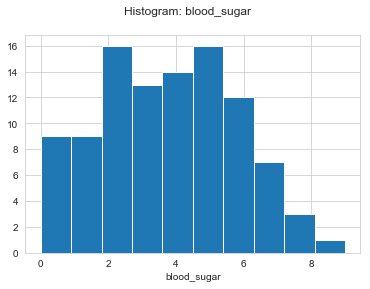

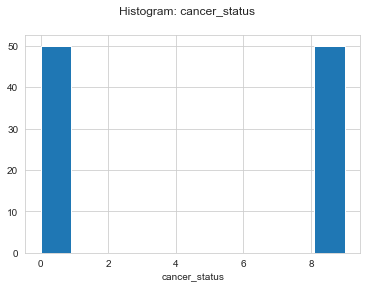

In [338]:
plot_histograms(data)

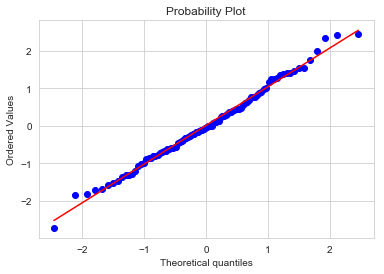

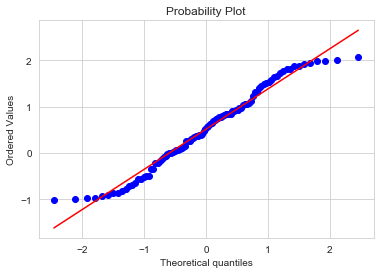

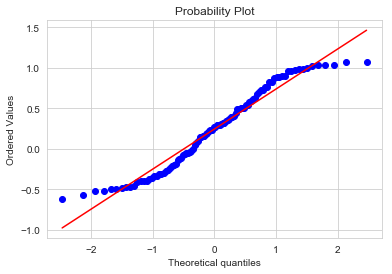

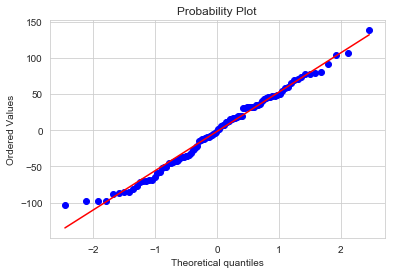

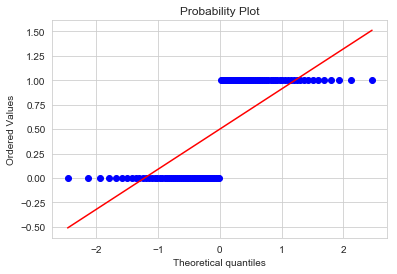

In [323]:
qq_plots(data)

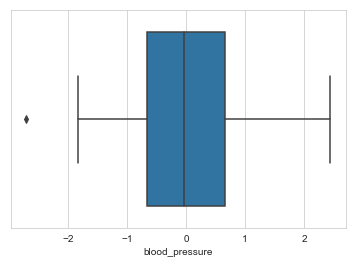

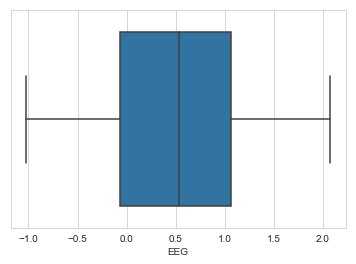

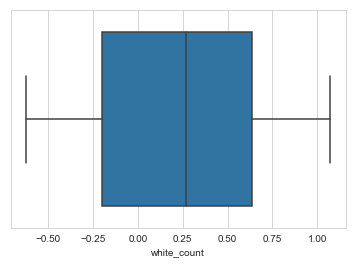

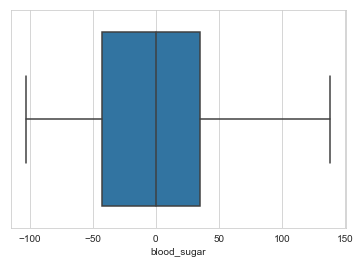

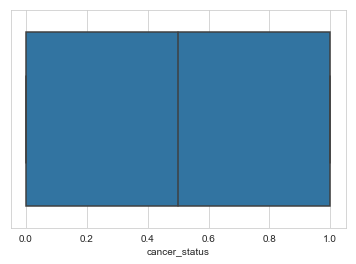

In [322]:
box_plots(data)

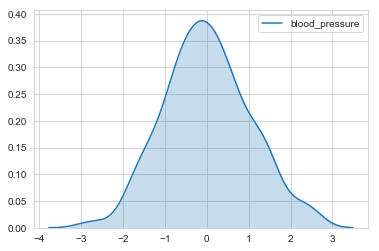

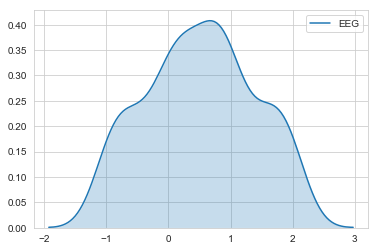

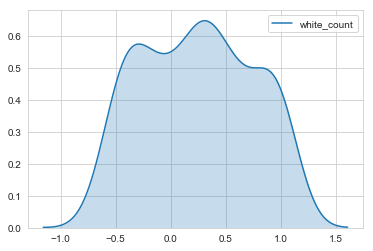

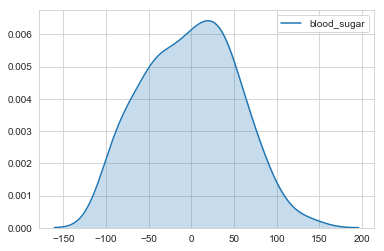

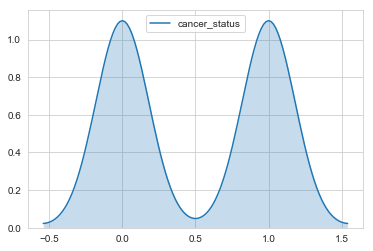

In [320]:
KDE_plots(data)

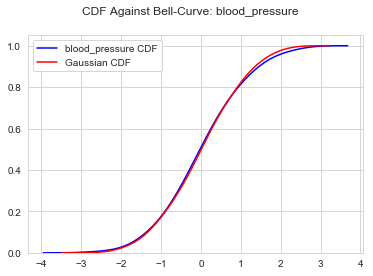

<Figure size 432x288 with 0 Axes>

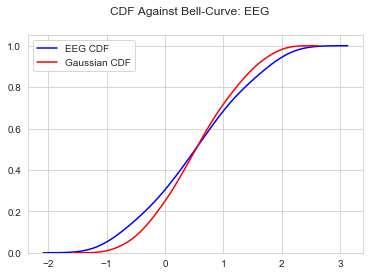

<Figure size 432x288 with 0 Axes>

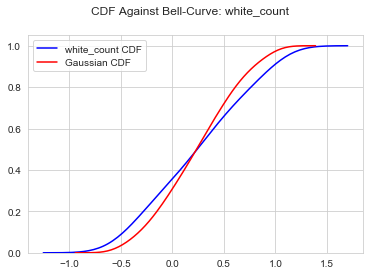

<Figure size 432x288 with 0 Axes>

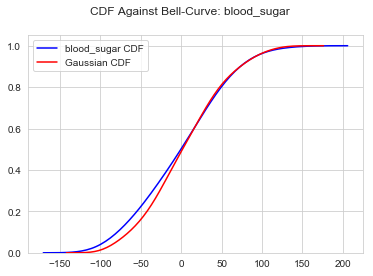

<Figure size 432x288 with 0 Axes>

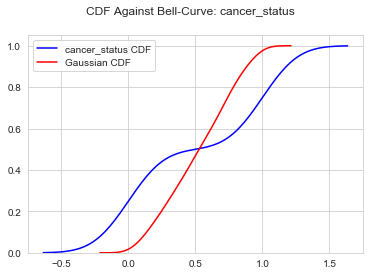

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [321]:
CDF_plots(data)